In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# Carrega Dataset
df_train = pd.read_csv('C:\\Users\\Michele\\Desktop\\Malicious\\Dataset\\Train\\train.csv', engine='python', sep=',')
df_test = pd.read_csv('C:\\Users\\Michele\\Desktop\Malicious\\Dataset\\Test\\test.csv', engine='python', sep=',')

In [116]:
X_train = df_train.drop(columns=['class', 'sub_class'], axis=1)
X_test = df_test.drop(columns=['class', 'sub_class'])

y_train = df_train['class']
y_test = df_test['class']

In [117]:
from sklearn.model_selection import train_test_split

#Importando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier 

In [118]:
# Definindo o valor de vizinhos
classifier = KNeighborsClassifier(n_neighbors=8)  

#Treinando o modelo, com dados de treinamento
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=8)

In [119]:
# Prevendo os valores de Y para os dados de teste (X_test)
y_pred = classifier.predict(X_test) 

In [122]:
# Importando métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Matriz Confusa: 
[[13796  1021]
 [ 3084  4125]] 

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87     14817
           1       0.80      0.57      0.67      7209

    accuracy                           0.81     22026
   macro avg       0.81      0.75      0.77     22026
weighted avg       0.81      0.81      0.80     22026

Acurácia do modelo:  0.8136293471352039


Text(0, 0.5, 'Mean Error')

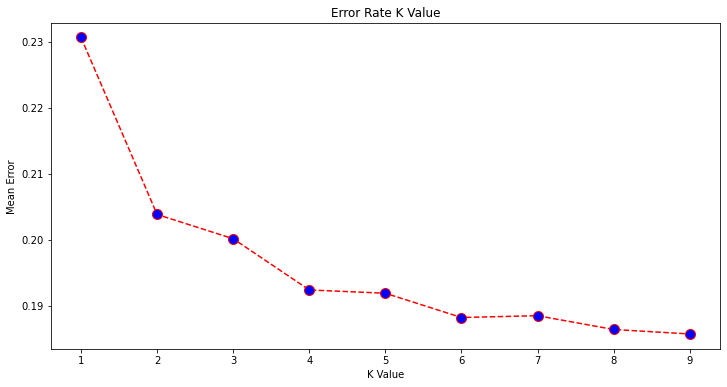

In [123]:
error = []
# Calculating error for K values
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [124]:
from sklearn.model_selection import cross_validate


In [132]:
# K-fold (k=5)
scores = cross_validate(classifier, X, y, cv=5)

In [133]:
# Results
print("Accuracy: %0.2f (+/- %0.2f)")

Accuracy: %0.2f (+/- %0.2f)
